In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [10]:
df=pd.read_csv('MonthWiseMarketArrivals_Clean.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


Q1. Get the modal price of onion for each month for the Mumbai market (Hint: set monthly date as index and drop redundant columns)

In [11]:
df1=df.copy()
df1.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [12]:
df1.date= pd.DatetimeIndex(df1.date)

In [13]:
df1.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [14]:
df1.sort_values('date',inplace=True)
df1.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
5399,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
5420,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
5441,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
5461,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
5481,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


In [15]:
df1.set_index('date',inplace=True)
df1.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


In [16]:
df2 = df1.loc[df1.city == "MUMBAI"].copy()
df2.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2004-01-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI
2004-02-01,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI
2004-03-01,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI
2004-04-01,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI
2004-05-01,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI


In [18]:
df2 = df2.drop(["market","year","priceMin","priceMax","state","quantity"], axis=1)

In [21]:
df2.head()

,month,priceMod,city
date,,,
2004-01-01,January,849,MUMBAI
2004-02-01,February,736,MUMBAI
2004-03-01,March,498,MUMBAI
2004-04-01,April,397,MUMBAI
2004-05-01,May,405,MUMBAI


# Stationarity Check

In [22]:
def adf_test(data):
    res = adfuller(data)
    print('ADF Statistic:',res[0])
    print('p-value:',res[1])
    if res[1]>0.05:
        print('Ho accpeted - Data is not stationary')
    else:
        print('H1 accpeted - Data is stationary')  

In [24]:
adf_test(df2['priceMod'])

ADF Statistic: -4.437736321058303
p-value: 0.00025436714348672806
H1 accpeted - Data is stationary


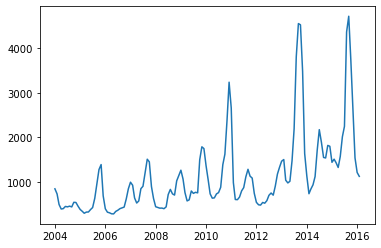

In [29]:
plt.plot(df2['priceMod'])
plt.show()

# Plotting ACF and PACF Functions

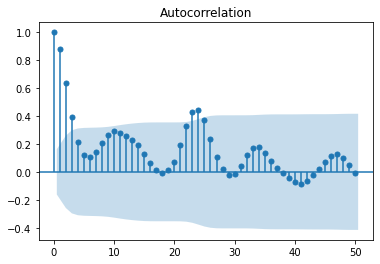

In [31]:
plot_acf(df2['priceMod'],lags=50)
plt.show()
# from pacf plot we get 'q'=18 (the fist value where it go negative)

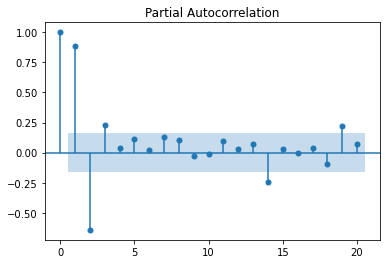

In [30]:
plot_pacf(df2['priceMod'],lags=20)
plt.show()
# from pacf plot we get 'p'=2 (the fist value where it go negative)

Best Approach (Most appropriate approach)
1) Use pmdarima - It handles the effect of seasonality as well efficiently

# Splitting the data into train and test

In [40]:
df3=df2.drop(['month','city'],axis=1)
df3.head()

,priceMod
date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405


In [41]:
df3.shape

(146, 1)

In [42]:
train= df3[:116]
test = df3[116:]
print(train.shape)
print(test.shape)

(116, 1)
(30, 1)


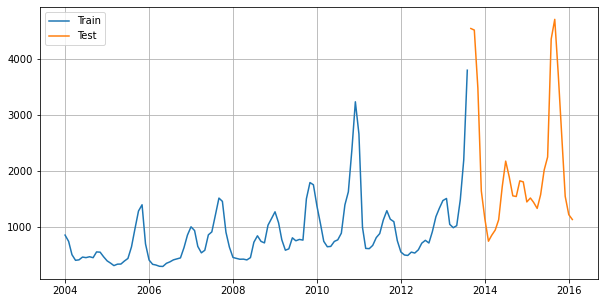

In [43]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.grid()
plt.legend()
plt.show()

In [44]:
print(train.tail(2))
print(test.head(2))
print(test.tail(2))

            priceMod
date                
2013-07-01      2194
2013-08-01      3803
            priceMod
date                
2013-09-01      4550
2013-10-01      4522
            priceMod
date                
2016-01-01      1215
2016-02-01      1128


In [45]:
# Function for performace metrics

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [47]:
def test_metrics(test,pred):
    mse = mean_squared_error(test,pred)
    rmse = mean_squared_error(test,pred,squared=False)
    mape = mean_absolute_percentage_error(test,pred)
    return mse,rmse,mape

In [49]:
# Applying different Time Series models on train data

# Base AR Model(1,0,0)

In [50]:
m1 = ARIMA(train,order=(1,0,0))
ar_m1 = m1.fit()
print(ar_m1.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  116
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -835.495
Date:                Mon, 25 Jul 2022   AIC                           1676.991
Time:                        12:02:00   BIC                           1685.251
Sample:                    01-01-2004   HQIC                          1680.344
                         - 08-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1098.4959    525.474      2.090      0.037      68.585    2128.407
ar.L1          0.9168      0.042     21.712      0.000       0.834       1.000
sigma2      1.039e+05   5725.650     18.151      0.0

In [54]:
fcast_m1 = ar_m1.forecast(30)
fcast_m1

2013-09-01    3577.989311
2013-10-01    3371.699175
2013-11-01    3182.572068
2013-12-01    3009.180054
2014-01-01    2850.213996
2014-02-01    2704.473675
2014-03-01    2570.858731
2014-04-01    2448.360350
2014-05-01    2336.053650
2014-06-01    2233.090700
2014-07-01    2138.694113
2014-08-01    2052.151181
2014-09-01    1972.808491
2014-10-01    1900.066994
2014-11-01    1833.377480
2014-12-01    1772.236434
2015-01-01    1716.182232
2015-02-01    1664.791655
2015-03-01    1617.676697
2015-04-01    1574.481633
2015-05-01    1534.880334
2015-06-01    1498.573803
2015-07-01    1465.287922
2015-08-01    1434.771376
2015-09-01    1406.793761
2015-10-01    1381.143841
2015-11-01    1357.627956
2015-12-01    1336.068558
2016-01-01    1316.302869
2016-02-01    1298.181657
Freq: MS, Name: predicted_mean, dtype: float64

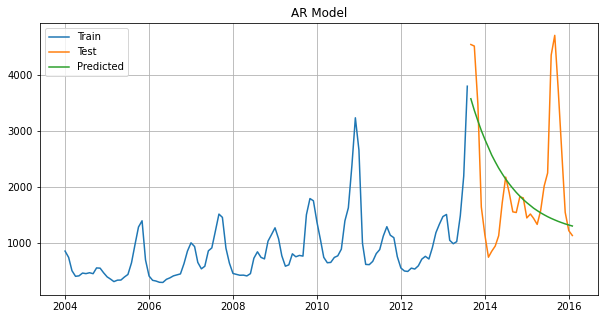

In [55]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m1,label='Predicted')
plt.title('AR Model')
plt.grid()
plt.legend()
plt.show()

In [56]:
aic_m1 = ar_m1.aic
print('AIC',aic_m1)
mse_m1,rmse_m1,mape_m1  = test_metrics(test,fcast_m1)

AIC 1676.9905209359097


In [58]:
m1_res = pd.DataFrame({'Model':'AR(1,0,0)','MSE':mse_m1,'RMSE':rmse_m1,
                       'MAPE':mape_m1,'AIC':aic_m1},index=[0])
m1_res

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.540731e+06,1241.261861,0.510138,1676.990521


# Base MA Model (0,0,1)

In [59]:
m2 = ARIMA(train,order=(0,0,1))
ar_m2 = m2.fit()
print(ar_m2.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  116
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -851.326
Date:                Mon, 25 Jul 2022   AIC                           1708.652
Time:                        12:13:09   BIC                           1716.913
Sample:                    01-01-2004   HQIC                          1712.006
                         - 08-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        882.2191     98.627      8.945      0.000     688.914    1075.524
ma.L1          0.9062      0.053     17.214      0.000       0.803       1.009
sigma2      1.367e+05      1e+04     13.656      0.0

In [60]:
fcast_m2 = ar_m2.forecast(30)
fcast_m2

2013-09-01    2923.342175
2013-10-01     882.219122
2013-11-01     882.219122
2013-12-01     882.219122
2014-01-01     882.219122
2014-02-01     882.219122
2014-03-01     882.219122
2014-04-01     882.219122
2014-05-01     882.219122
2014-06-01     882.219122
2014-07-01     882.219122
2014-08-01     882.219122
2014-09-01     882.219122
2014-10-01     882.219122
2014-11-01     882.219122
2014-12-01     882.219122
2015-01-01     882.219122
2015-02-01     882.219122
2015-03-01     882.219122
2015-04-01     882.219122
2015-05-01     882.219122
2015-06-01     882.219122
2015-07-01     882.219122
2015-08-01     882.219122
2015-09-01     882.219122
2015-10-01     882.219122
2015-11-01     882.219122
2015-12-01     882.219122
2016-01-01     882.219122
2016-02-01     882.219122
Freq: MS, Name: predicted_mean, dtype: float64

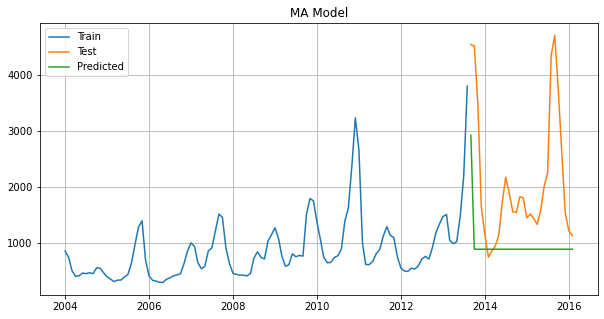

In [61]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m2,label='Predicted')
plt.title('MA Model')
plt.grid()
plt.legend()
plt.show()

In [62]:
aic_m2 = ar_m2.aic
print('AIC',aic_m2)
mse_m2,rmse_m2,mape_m2  = test_metrics(test,fcast_m2)

AIC 1708.6521800731784


In [63]:
m2_res = pd.DataFrame({'Model':'MA(0,0,1)','MSE':mse_m2,'RMSE':rmse_m2,
                       'MAPE':mape_m2,'AIC':aic_m2},index=[1])
m2_res

,Model,MSE,RMSE,MAPE,AIC
1,"MA(0,0,1)",2.428252e+06,1558.285109,0.456706,1708.65218


In [64]:
r2 = pd.concat([m1_res,m2_res])
r2

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.540731e+06,1241.261861,0.510138,1676.990521
1,"MA(0,0,1)",2.428252e+06,1558.285109,0.456706,1708.652180


# Base ARMA Model (1,0,1)

In [65]:
m3 = ARIMA(train,order=(1,0,1))
ar_m3 = m3.fit()
print(ar_m3.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  116
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -816.148
Date:                Mon, 25 Jul 2022   AIC                           1640.296
Time:                        12:15:19   BIC                           1651.310
Sample:                    01-01-2004   HQIC                          1644.767
                         - 08-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        865.9771    445.531      1.944      0.052      -7.247    1739.201
ar.L1          0.8584      0.052     16.594      0.000       0.757       0.960
ma.L1          0.5898      0.079      7.475      0.0

In [66]:
fcast_m3 = ar_m3.forecast(30)
fcast_m3

2013-09-01    4275.239920
2013-10-01    3792.524970
2013-11-01    3378.157266
2013-12-01    3022.459572
2014-01-01    2717.124845
2014-02-01    2455.022233
2014-03-01    2230.030531
2014-04-01    2036.895234
2014-05-01    1871.105819
2014-06-01    1728.790401
2014-07-01    1606.625316
2014-08-01    1501.757493
2014-09-01    1411.737826
2014-10-01    1334.463976
2014-11-01    1268.131272
2014-12-01    1211.190565
2015-01-01    1162.312050
2015-02-01    1120.354207
2015-03-01    1084.337143
2015-04-01    1053.419708
2015-05-01    1026.879850
2015-06-01    1004.097750
2015-07-01     984.541350
2015-08-01     967.753926
2015-09-01     953.343421
2015-10-01     940.973288
2015-11-01     930.354634
2015-12-01     921.239466
2016-01-01     913.414908
2016-02-01     906.698224
Freq: MS, Name: predicted_mean, dtype: float64

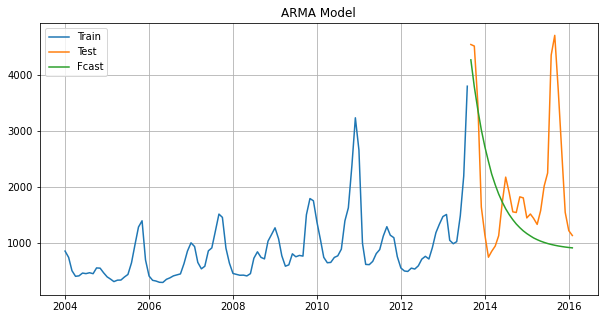

In [67]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m3,label='Fcast')
plt.title('ARMA Model')
plt.grid()
plt.legend()
plt.show()

In [68]:
aic_m3 = ar_m3.aic
print('AIC',aic_m3)
mse_m3,rmse_m3,mape_m3  = test_metrics(test,fcast_m3)

AIC 1640.2955301577501


In [69]:
m3_res = pd.DataFrame({'Model':'ARMA(1,0,1)','MSE':mse_m3,'RMSE':rmse_m3,
                       'MAPE':mape_m3,'AIC':aic_m3},index=[2])
m3_res

,Model,MSE,RMSE,MAPE,AIC
2,"ARMA(1,0,1)",1.770619e+06,1330.646225,0.52481,1640.29553


In [70]:
r3 = pd.concat([r2,m3_res])
r3

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.540731e+06,1241.261861,0.510138,1676.990521
1,"MA(0,0,1)",2.428252e+06,1558.285109,0.456706,1708.652180
2,"ARMA(1,0,1)",1.770619e+06,1330.646225,0.524810,1640.295530


# BASE ARIMA(1,1,1) Model

In [71]:
m4 = ARIMA(train,order=(1,1,1))
ar_m4 = m4.fit()
print(ar_m4.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  116
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -807.594
Date:                Mon, 25 Jul 2022   AIC                           1621.188
Time:                        12:16:32   BIC                           1629.423
Sample:                    01-01-2004   HQIC                          1624.530
                         - 08-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3049      0.082      3.715      0.000       0.144       0.466
ma.L1          0.4128      0.100      4.140      0.000       0.217       0.608
sigma2      7.332e+04   5151.366     14.233      0.0

In [72]:
fcast_m4 = ar_m4.forecast(30)
fcast_m4

2013-09-01    4803.485717
2013-10-01    5108.487084
2013-11-01    5201.467756
2013-12-01    5229.813221
2014-01-01    5238.454429
2014-02-01    5241.088730
2014-03-01    5241.891805
2014-04-01    5242.136625
2014-05-01    5242.211259
2014-06-01    5242.234012
2014-07-01    5242.240948
2014-08-01    5242.243062
2014-09-01    5242.243707
2014-10-01    5242.243904
2014-11-01    5242.243963
2014-12-01    5242.243982
2015-01-01    5242.243987
2015-02-01    5242.243989
2015-03-01    5242.243989
2015-04-01    5242.243990
2015-05-01    5242.243990
2015-06-01    5242.243990
2015-07-01    5242.243990
2015-08-01    5242.243990
2015-09-01    5242.243990
2015-10-01    5242.243990
2015-11-01    5242.243990
2015-12-01    5242.243990
2016-01-01    5242.243990
2016-02-01    5242.243990
Freq: MS, Name: predicted_mean, dtype: float64

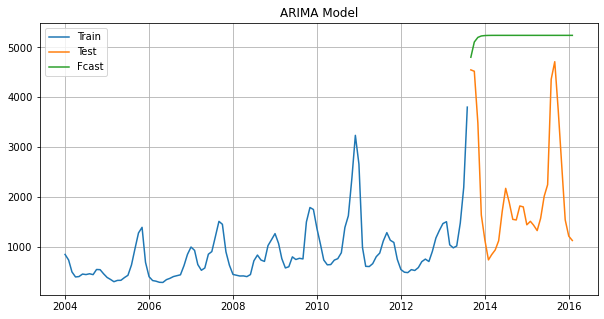

In [73]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m4,label='Fcast')
plt.title('ARIMA Model')
plt.grid()
plt.legend()
plt.show()

In [74]:
aic_m4 = ar_m4.aic
print('AIC',aic_m4)

mse_m4,rmse_m4,mape_m4  = test_metrics(test,fcast_m4)

AIC 1621.1877485027421


In [75]:
m4_res = pd.DataFrame({'Model':'ARIMA(1,1,1)','MSE':mse_m4,'RMSE':rmse_m4,
                       'MAPE':mape_m4,'AIC':aic_m4},index=[3])
m4_res

,Model,MSE,RMSE,MAPE,AIC
3,"ARIMA(1,1,1)",1.133690e+07,3367.030776,2.229147,1621.187749


In [76]:
r4 = pd.concat([r3,m4_res])
r4

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.540731e+06,1241.261861,0.510138,1676.990521
1,"MA(0,0,1)",2.428252e+06,1558.285109,0.456706,1708.652180
2,"ARMA(1,0,1)",1.770619e+06,1330.646225,0.524810,1640.295530
3,"ARIMA(1,1,1)",1.133690e+07,3367.030776,2.229147,1621.187749


# Custom Arima

In [79]:
p=list(range(0,5))
q=list(range(0,4))
d=list(range(0,5))
mse_arima=[]
rmse_arima=[]
aic_arima=[]
pdq=[]
def custom_arima():
    for i in p:
        for j in d:
            for k in q:
                param=(i,j,k)
                model1=ARIMA(train,order=param)
                model1_fit=model1.fit()
                ypred=model1_fit.forecast(steps=30)
                mse=mean_squared_error(test,ypred.values)
                rmse=np.sqrt(mse)
                mse_arima.append(mse)
                rmse_arima.append(rmse)
                aic_arima.append(model1_fit.aic)
                pdq.append((i,j,k))
                print(f'ARIMA at (p,d,q):{i,j,k}')
                print(f'MSE:{round(mse,3)} , RMSE:{round(rmse,3)},AIC:{round(model1_fit.aic,3)}')
                print('-'*50) 

In [80]:
custom_arima()

ARIMA at (p,d,q):(0, 0, 0)
MSE:2829718.476 , RMSE:1682.177,AIC:1804.086
--------------------------------------------------
ARIMA at (p,d,q):(0, 0, 1)
MSE:2428252.482 , RMSE:1558.285,AIC:1708.652
--------------------------------------------------
ARIMA at (p,d,q):(0, 0, 2)
MSE:2097874.078 , RMSE:1448.404,AIC:1649.782
--------------------------------------------------
ARIMA at (p,d,q):(0, 0, 3)
MSE:1967963.102 , RMSE:1402.841,AIC:1641.91
--------------------------------------------------
ARIMA at (p,d,q):(0, 1, 0)
MSE:4330700.667 , RMSE:2081.034,AIC:1659.194
--------------------------------------------------
ARIMA at (p,d,q):(0, 1, 1)
MSE:7632265.977 , RMSE:2762.656,AIC:1623.524
--------------------------------------------------
ARIMA at (p,d,q):(0, 1, 2)
MSE:10943260.449 , RMSE:3308.06,AIC:1618.317
--------------------------------------------------
ARIMA at (p,d,q):(0, 1, 3)
MSE:6805425.637 , RMSE:2608.721,AIC:1618.171
--------------------------------------------------
ARIMA at (p,d,q):

ARIMA at (p,d,q):(3, 1, 2)
MSE:1234087.966 , RMSE:1110.895,AIC:1618.184
--------------------------------------------------
ARIMA at (p,d,q):(3, 1, 3)
MSE:881459.828 , RMSE:938.861,AIC:1616.401
--------------------------------------------------
ARIMA at (p,d,q):(3, 2, 0)
MSE:518255032.28 , RMSE:22765.215,AIC:1627.021
--------------------------------------------------
ARIMA at (p,d,q):(3, 2, 1)
MSE:7711347.947 , RMSE:2776.931,AIC:1610.787
--------------------------------------------------
ARIMA at (p,d,q):(3, 2, 2)
MSE:8797342.665 , RMSE:2966.031,AIC:1612.379
--------------------------------------------------
ARIMA at (p,d,q):(3, 2, 3)
MSE:11748026.368 , RMSE:3427.539,AIC:1612.949
--------------------------------------------------
ARIMA at (p,d,q):(3, 3, 0)
MSE:20116163165.414 , RMSE:141831.46,AIC:1650.547
--------------------------------------------------
ARIMA at (p,d,q):(3, 3, 1)
MSE:644127645.081 , RMSE:25379.67,AIC:1620.634
--------------------------------------------------
ARIMA at

In [82]:
print(min(mse_arima),mse_arima.index(min(mse_arima)))
print(min(rmse_arima),rmse_arima.index(min(rmse_arima)))
print(min(aic_arima),aic_arima.index(min(aic_arima)))
print(pdq[46],pdq[54])

811020.0300807547 46
900.5665050848575 46
1604.2411474404894 54
(2, 1, 2) (2, 3, 2)


In [83]:
# so the best value of (p,d,q) is(2,1,2) where rmse is 900.566 lets build a model on that

# MODEL CUSTOM ARIMA(2,1,2)

In [84]:
m5 = ARIMA(train,order=(2,1,2))
ar_m5 = m5.fit()
print(ar_m5.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  116
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -802.802
Date:                Mon, 25 Jul 2022   AIC                           1615.605
Time:                        12:22:08   BIC                           1629.330
Sample:                    01-01-2004   HQIC                          1621.176
                         - 08-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2338      0.133      9.305      0.000       0.974       1.494
ar.L2         -0.5389      0.140     -3.856      0.000      -0.813      -0.265
ma.L1         -0.6221      0.174     -3.581      0.0

In [85]:
fcast_m5 = ar_m5.forecast(30)
fcast_m5

2013-09-01    4458.100633
2013-10-01    4078.219199
2013-11-01    3256.462333
2013-12-01    2447.279477
2014-01-01    1891.746747
2014-02-01    1642.398957
2014-03-01    1634.134204
2014-04-01    1758.315645
2014-05-01    1915.988579
2014-06-01    2043.606319
2014-07-01    2116.091768
2014-08-01    2136.750673
2014-09-01    2123.176339
2014-10-01    2095.294391
2014-11-01    2068.208278
2014-12-01    2049.814763
2015-01-01    2041.717553
2015-02-01    2041.639616
2015-03-01    2045.907211
2015-04-01    2051.214703
2015-05-01    2055.463354
2015-06-01    2057.845152
2015-07-01    2058.494200
2015-08-01    2058.011415
2015-09-01    2057.065954
2015-10-01    2056.159598
2015-11-01    2055.550838
2015-12-01    2055.288184
2016-01-01    2055.292187
2016-02-01    2055.438677
Freq: MS, Name: predicted_mean, dtype: float64

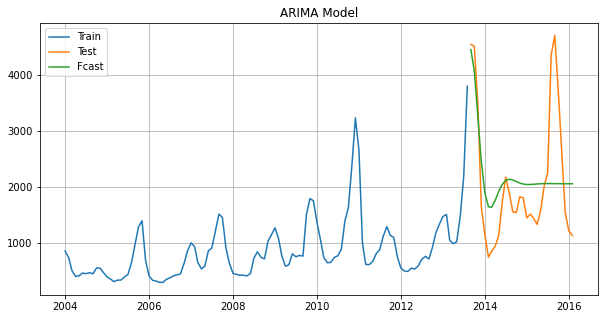

In [87]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m5,label='Fcast')
plt.title('ARIMA Model')
plt.grid()
plt.legend()
plt.show()

In [88]:
aic_m5 = ar_m5.aic
print('AIC',aic_m5)

mse_m5,rmse_m5,mape_m5  = test_metrics(test,fcast_m5)

AIC 1615.6048964825661


In [89]:
m5_res = pd.DataFrame({'Model':'CUSTOM ARIMA(2,1,2)','MSE':mse_m5,'RMSE':rmse_m5,
                       'MAPE':mape_m5,'AIC':aic_m5},index=[3])
m5_res

,Model,MSE,RMSE,MAPE,AIC
3,"CUSTOM ARIMA(2,1,2)",811020.030081,900.566505,0.406001,1615.604896


In [90]:
r5 = pd.concat([r4,m5_res])
r5

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.540731e+06,1241.261861,0.510138,1676.990521
1,"MA(0,0,1)",2.428252e+06,1558.285109,0.456706,1708.652180
2,"ARMA(1,0,1)",1.770619e+06,1330.646225,0.524810,1640.295530
3,"ARIMA(1,1,1)",1.133690e+07,3367.030776,2.229147,1621.187749
3,"CUSTOM ARIMA(2,1,2)",8.110200e+05,900.566505,0.406001,1615.604896


# INFERENCE
#### Based on RMSE score CUSTOM ARIMA(2,1,2) is the best model to predict onion price for mumbai market 

In [93]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Triple Exponential Smoothing (Holt Winter Smoothing)

In [97]:
alpha=0.3
beta=0.1
gamma=0.1
tes=ExponentialSmoothing(train)
tes_m6=tes.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
df1['TES']=tes_m6.fittedvalues



In [100]:
fcast_m6=tes_m6.forecast(30)
fcast_m6

2013-09-01    2194.940898
2013-10-01    2194.940898
2013-11-01    2194.940898
2013-12-01    2194.940898
2014-01-01    2194.940898
2014-02-01    2194.940898
2014-03-01    2194.940898
2014-04-01    2194.940898
2014-05-01    2194.940898
2014-06-01    2194.940898
2014-07-01    2194.940898
2014-08-01    2194.940898
2014-09-01    2194.940898
2014-10-01    2194.940898
2014-11-01    2194.940898
2014-12-01    2194.940898
2015-01-01    2194.940898
2015-02-01    2194.940898
2015-03-01    2194.940898
2015-04-01    2194.940898
2015-05-01    2194.940898
2015-06-01    2194.940898
2015-07-01    2194.940898
2015-08-01    2194.940898
2015-09-01    2194.940898
2015-10-01    2194.940898
2015-11-01    2194.940898
2015-12-01    2194.940898
2016-01-01    2194.940898
2016-02-01    2194.940898
Freq: MS, dtype: float64

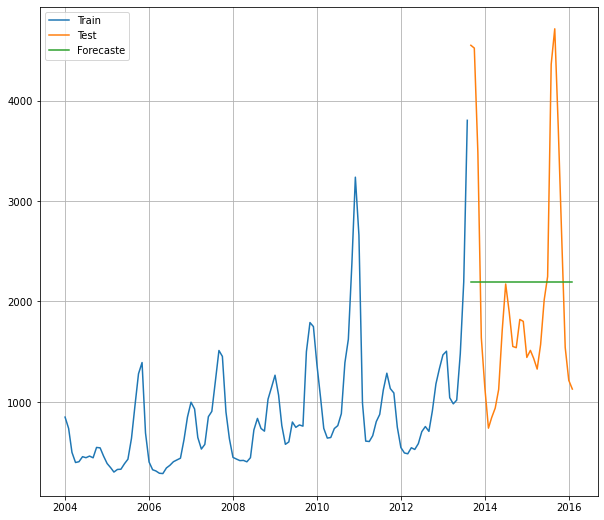

In [101]:
plt.figure(figsize=(10,9))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m6,label='Forecaste')
plt.legend()
plt.grid()
plt.show()

In [102]:
aic_m6=tes_m6.aic
print('AIC:',aic_m6)

AIC: 1427.6165266508474


In [105]:
mse_m6,rmse_m6,mape_m6  = test_metrics(test,fcast_m6)

In [106]:
m6_res = pd.DataFrame({'Model':'TES(0.3,0.1,0.1)','MSE':mse_m6,'RMSE':rmse_m6,
                       'MAPE':mape_m6,'AIC':aic_m6},index=[4])
m6_res

,Model,MSE,RMSE,MAPE,AIC
4,"TES(0.3,0.1,0.1)",1.370681e+06,1170.760655,0.556452,1427.616527


In [107]:
r6 = pd.concat([r5,m6_res])
r6

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.540731e+06,1241.261861,0.510138,1676.990521
1,"MA(0,0,1)",2.428252e+06,1558.285109,0.456706,1708.652180
2,"ARMA(1,0,1)",1.770619e+06,1330.646225,0.524810,1640.295530
3,"ARIMA(1,1,1)",1.133690e+07,3367.030776,2.229147,1621.187749
3,"CUSTOM ARIMA(2,1,2)",8.110200e+05,900.566505,0.406001,1615.604896
4,"TES(0.3,0.1,0.1)",1.370681e+06,1170.760655,0.556452,1427.616527


# INFERENCE
#### Based on RMSE score CUSTOM ARIMA(2,1,2) is the best model to predict onion price for mumbai market 

# Forecast onion price for Mumbai market using Triple Exponential Smoothing (Holt Winter Smoothing)(alpha=0.3,beta=0.1,gamma=0.1)

In [108]:
fcast_m6=tes_m6.forecast(30)
fcast_m6

2013-09-01    2194.940898
2013-10-01    2194.940898
2013-11-01    2194.940898
2013-12-01    2194.940898
2014-01-01    2194.940898
2014-02-01    2194.940898
2014-03-01    2194.940898
2014-04-01    2194.940898
2014-05-01    2194.940898
2014-06-01    2194.940898
2014-07-01    2194.940898
2014-08-01    2194.940898
2014-09-01    2194.940898
2014-10-01    2194.940898
2014-11-01    2194.940898
2014-12-01    2194.940898
2015-01-01    2194.940898
2015-02-01    2194.940898
2015-03-01    2194.940898
2015-04-01    2194.940898
2015-05-01    2194.940898
2015-06-01    2194.940898
2015-07-01    2194.940898
2015-08-01    2194.940898
2015-09-01    2194.940898
2015-10-01    2194.940898
2015-11-01    2194.940898
2015-12-01    2194.940898
2016-01-01    2194.940898
2016-02-01    2194.940898
Freq: MS, dtype: float64